In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [2]:
df = pd.read_csv("flood_risk_dataset_india.csv")

In [3]:
print("🔹 First 5 rows of the dataset:\n", df.head())
print("\n🔹 Dataset Info:\n")
print(df.info())
print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Summary Statistics:\n", df.describe())

🔹 First 5 rows of the dataset:
     Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  35.570715  77.654451      55.353599         28.778774     27.585422   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
4  12.524541  81.822101     144.626803         32.635692     36.292267   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465433    Water Body   
1             2472.585219         8.811019    7330.608875        Forest   
2              977.328053         4.631799    2205.873488  Agricultural   
3             3683.208933         2.891787    2512.277800        Desert   
4             2093.390678         3.188466    2001.818223  Agricultural   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0 

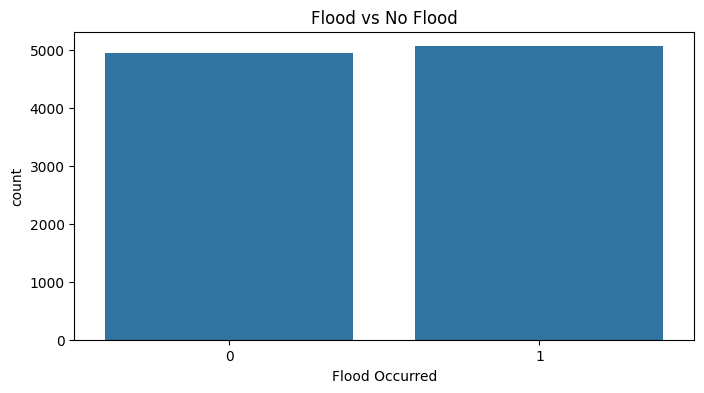

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(x='Flood Occurred', data=df)
plt.title("Flood vs No Flood")
plt.show()

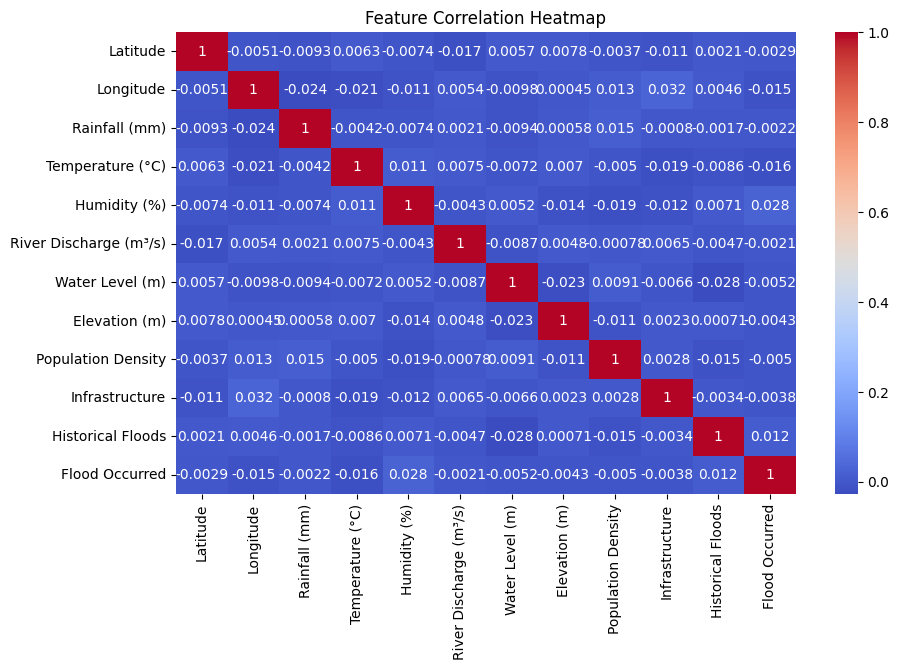

In [5]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
flood_df = df[df["Flood Occurred"] == 1]
noflood_df = df[df["Flood Occurred"] == 0]

# Make ratio ~70% flood, 30% no flood, this was mainly done as previously results were more biased towards no flood outcome
noflood_downsampled = noflood_df.sample(frac=0.3, random_state=42)
balanced_df = pd.concat([flood_df, noflood_downsampled]).sample(frac=1, random_state=42)

In [7]:
features = [
    'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)',
    'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)',
    'Population Density', 'Infrastructure', 'Historical Floods'
]

X = balanced_df[features]
y = balanced_df['Flood Occurred']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    random_state=42,
    solver='liblinear',
    penalty='l2',
    C=0.7,
    max_iter=1000
)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [12]:
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

✅ Accuracy: 77.22%

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.51      0.55       2278
           1       0.77      0.85      0.81       7722

    accuracy                           0.77      10000
   macro avg       0.68      0.68      0.68      10000
weighted avg       0.73      0.77      0.75      10000

Confusion Matrix:
[[1161  774]
 [1161 6561]]


C:\Users\daivy\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\daivy\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\daivy\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(
    n_estimators=200,     # number of trees in the forest
    random_state=42,      # reproducibility
    max_depth=10,         # limit tree depth to prevent overfitting
    min_samples_split=5,  # minimum samples required to split a node
    min_samples_leaf=2,   # minimum samples required at each leaf node
    max_features='sqrt'   # consider sqrt(total features) when looking for best split
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.4f}%")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred))



Accuracy: 80.27%

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.53      0.59       2278
           1       0.92      0.88      0.90       7722

    accuracy                           0.8027      10000
   macro avg       0.80      0.70      0.74      10000
weighted avg       0.86      0.80      0.82      10000

Confusion Matrix:
[[1210  561]
 [ 905 6817]]


C:\Users\daivy\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\daivy\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\daivy\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [14]:
with open('lr_classifier_flood.pkl', 'rb') as f:
    lr_model = pickle.load(f)
with open('rf_classifier_flood.pkl', 'rb') as f:
    rf_model = pickle.load(f)
with open('scaler_flood.pkl', 'rb') as f:
    scaler = pickle.load(f)